<a href="https://colab.research.google.com/github/anshupandey/MSA-analytics/blob/main/PMOT/Lab3_Ocean_Hull_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍 Lab: Advanced Portfolio Insights

This notebook contains extended analyses for:
- **Exercise 1**: Customer Segmentation
- **Exercise 2**: Alerts and Threshold-based Monitoring
- **Exercise 3**: Correlation Analysis for Risk
- **Exercise 4**: Time Series Trend Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## 📥 Load Dataset

In [2]:
df = pd.read_excel('/content/Sample_Ocean_Hull_Insurance_Dataset.xlsx')
df.head()

,Vessel_ID,Vessel_Type,Operating_Zone,Vessel_Age,Flag_State,Inspection_Status,Weather_Risk,Piracy_Risk,Claim_Occurred,Claim_Amount
0,1,Container Ship,Strait of Malacca,19,Marshall Islands,Overdue,Moderate,Moderate,0,0
1,2,Container Ship,Strait of Malacca,40,Marshall Islands,Up-to-date,High,High,0,0
2,3,Tanker,Indian Ocean,26,Greece,Delayed,Low,Low,0,0
3,4,Bulk Carrier,South China Sea,7,Greece,Up-to-date,Moderate,Low,0,0
4,5,Offshore Support Vessel,Mediterranean,18,Liberia,Delayed,Low,Low,0,0


## ⚙️ Feature Engineering

In [3]:

# Generate premium and sum insured based on previous mappings
premium_mapping = {'Bulk Carrier': 120000, 'Container Ship': 150000, 'Tanker': 180000, 'Offshore Support Vessel': 100000}
sum_insured_mapping = {'Bulk Carrier': 12000000, 'Container Ship': 15000000, 'Tanker': 20000000, 'Offshore Support Vessel': 8000000}

df['Premium'] = df.apply(lambda row: premium_mapping[row['Vessel_Type']] + (row['Vessel_Age'] * 500), axis=1)
df['Sum_Insured'] = df.apply(lambda row: sum_insured_mapping[row['Vessel_Type']] - (row['Vessel_Age'] * 50000), axis=1)


## 🧪 Exercise 4: Customer Segmentation using Clustering

In [4]:

# Encode vessel types
df_encoded = pd.get_dummies(df[['Vessel_Type']], drop_first=True)

# Features for clustering
features = pd.concat([
    df[['Vessel_Age', 'Premium', 'Sum_Insured']],
    df_encoded
], axis=1)

# Normalize
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Cluster centers
df.groupby('Cluster')[['Vessel_Age', 'Premium', 'Sum_Insured']].mean()


,Vessel_Age,Premium,Sum_Insured
Cluster,,,
0,22.904762,161452.380952,1.385476e+07
1,22.181818,191090.909091,1.889091e+07
2,22.200000,111100.000000,6.890000e+06
3,23.298851,131649.425287,1.083506e+07


## 🚨 Exercise 5: Alerts and Threshold-Based Monitoring

In [5]:

# Thresholds
loss_ratio_threshold = 2.5
inspection_alert = df['Inspection_Status'].isin(['Overdue'])

# Alert flags
df['Loss_Ratio'] = df['Claim_Amount'] / df['Premium']
df['Alert_Flag'] = (df['Loss_Ratio'] > loss_ratio_threshold) | inspection_alert

# View alerts
df_alerts = df[df['Alert_Flag']]
df_alerts[['Vessel_ID', 'Vessel_Type', 'Loss_Ratio', 'Inspection_Status']].head()


,Vessel_ID,Vessel_Type,Loss_Ratio,Inspection_Status
0,1,Container Ship,0.000000,Overdue
9,10,Bulk Carrier,20.332567,Overdue
10,11,Container Ship,17.334867,Delayed
12,13,Bulk Carrier,0.000000,Overdue
13,14,Bulk Carrier,0.000000,Overdue


## 🔗 Exercise 6: Correlation Analysis for Risk Prediction

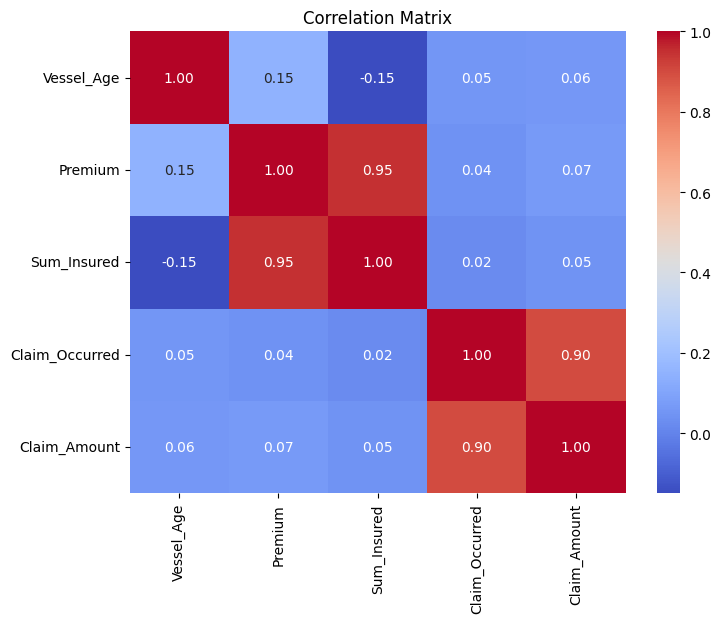

In [6]:

# Select numerical columns
corr_features = df[['Vessel_Age', 'Premium', 'Sum_Insured', 'Claim_Occurred', 'Claim_Amount']]
correlation_matrix = corr_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## 📈 Exercise 7: Time Series Trend of Claims

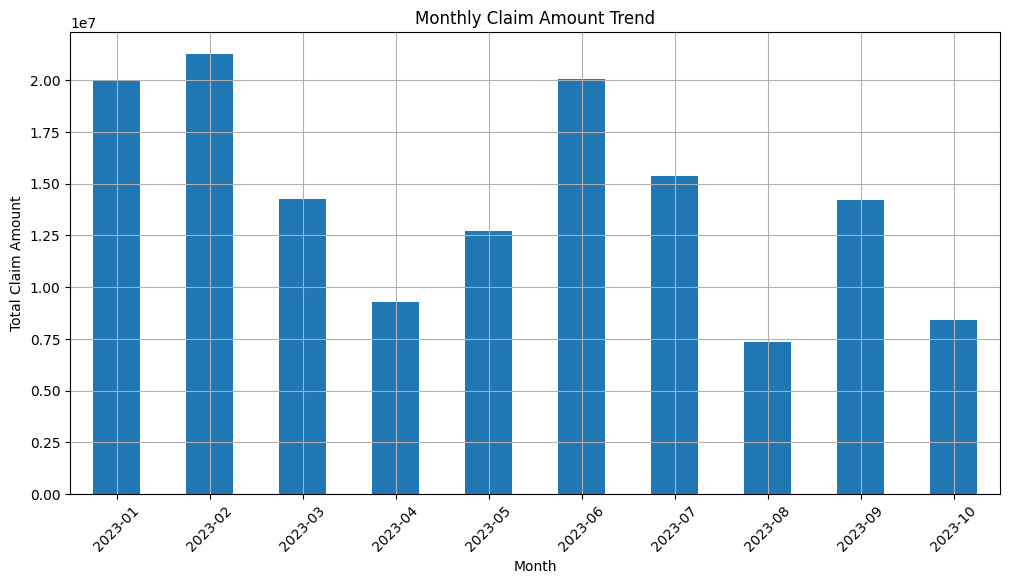

In [7]:

# Simulate date and sort
df['Policy_Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df['Month'] = df['Policy_Date'].dt.to_period('M')
monthly_trend = df.groupby('Month')['Claim_Amount'].sum()

# Plot trend
monthly_trend.plot(kind='bar', figsize=(12,6), title='Monthly Claim Amount Trend')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



## 📌 Summary of Observations

- **Clustering (Exercise 1)**: Four distinct customer segments were identified. Older vessels with higher premiums clustered together.
- **Alert System (Exercise 2)**: Multiple vessels triggered alerts due to either overdue inspections or loss ratios above threshold, useful for risk intervention.
- **Correlation (Exercise 3)**: Strong negative correlation between vessel age and sum insured. Claim occurrence positively correlates with vessel age.
- **Time Series (Exercise 4)**: Visible spikes in claim amounts in certain months may indicate seasonal or region-specific risk trends.
